# Bank Marketing Dataset - Decision Tree Prediction

### Performing prediction on a sample customer from the Bank Marketing dataset using a trained Decision Tree classifier, with label encoding for categorical features.

## 1 - Import libraries

In [1]:
# Core
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


## 2 - Load the dataset

In [3]:
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3 - Data Inspection & Cleaning

In [4]:
# Shape of dataset (rows, columns)
print("Dataset shape:", data.shape)

Dataset shape: (45211, 17)


In [5]:
# Preview first 5 rows
print("\nFirst 5 rows:")
display(data.head())


First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Data types and non-null count
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
# Basic statistics for numeric columns
print("\nStatistical Summary (Numeric Columns):")
display(data.describe())


Statistical Summary (Numeric Columns):


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Check unique values for each column
print("\nUnique values per column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique values per column:
age: 77 unique values
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
balance: 7168 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
day: 31 unique values
month: 12 unique values
duration: 1573 unique values
campaign: 48 unique values
pdays: 559 unique values
previous: 41 unique values
poutcome: 4 unique values
y: 2 unique values


## 4 - Preprocessing (Encoding + Splitting)

In [10]:
# Copy dataset to avoid modifying original
df = data.copy()

In [11]:
# Encode all categorical columns using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Separate features (X) and target (y)
X = df.drop('y', axis=1)  # 'y' is the target column
y = df['y']

In [13]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (36168, 16)
Testing set shape: (9043, 16)


## 5 - Model Training

In [15]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # use information gain
    max_depth=None,       # let the tree grow fully
    random_state=42
)

In [16]:
# Train the model
dt_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


## 6 - Train the Decision Tree Classifier

In [17]:
# Create the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 7 - Model Evaluation
After training, we evaluate the model on the test data (X_test, y_test).
We’ll calculate:

Accuracy — percentage of correct predictions.

Classification Report — precision, recall, F1-score.

Confusion Matrix — to visualize correct vs. incorrect predictions.

In [18]:
# Predictions on test data
y_pred = dt_model.predict(X_test)

In [19]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8758


In [20]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.49      0.49      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



In [21]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[7389  563]
 [ 560  531]]


## 8 - Visualizing the Decision Tree

In [22]:
!pip install graphviz

In [24]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


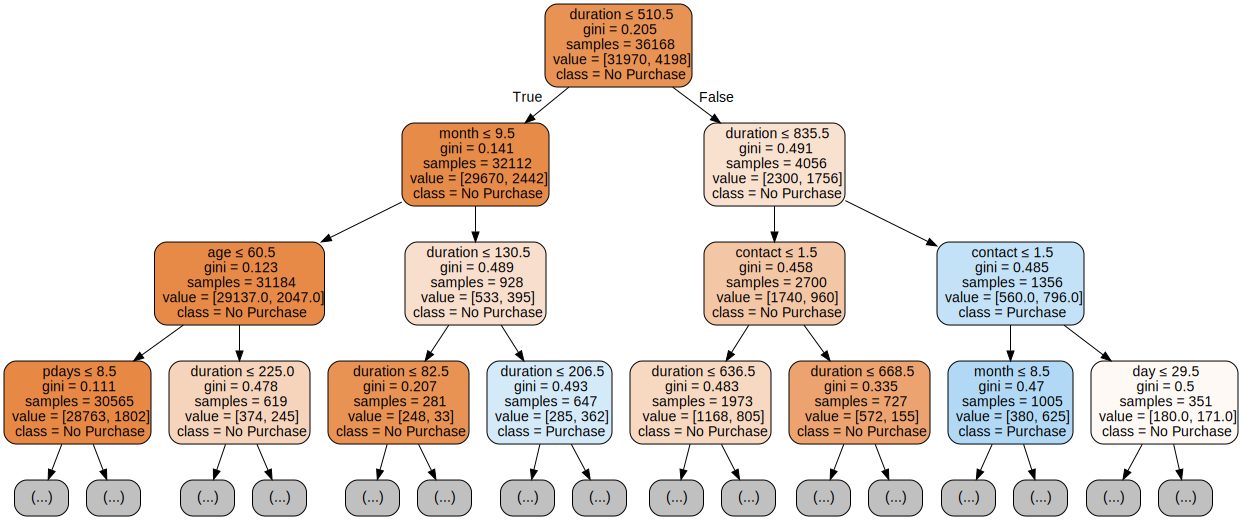

In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3,  # Limit the depth of the tree for better visualization
)

graph = graphviz.Source(dot_data)
graph

## 9 - Confusion Matrix Visualization (Counts + Percentages)

In [25]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
# Create percentage version
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

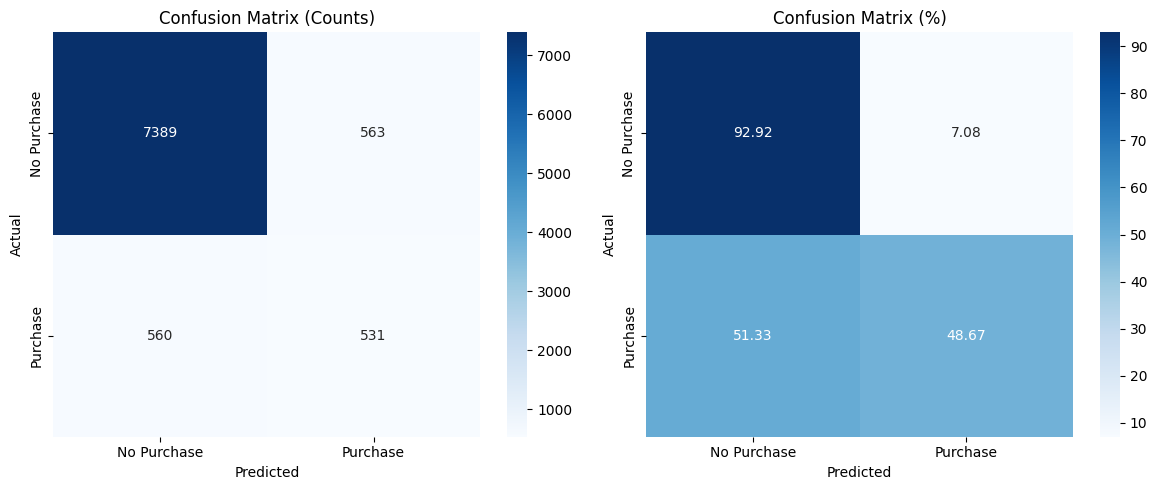

In [27]:
# Create side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# --- Left: Raw counts ---
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
ax[0].set_title("Confusion Matrix (Counts)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# --- Right: Percentages ---
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", ax=ax[1],
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
ax[1].set_title("Confusion Matrix (%)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

# Adjust layout & show
plt.tight_layout()
plt.show()

## 10 - Predicting a new result

In [28]:
# Define the sample customer data
new_data_dict = {
    'age': [36],
    'job': [label_encoders['job'].transform(['technician'])[0]],
    'marital': [label_encoders['marital'].transform(['married'])[0]],
    'education': [label_encoders['education'].transform(['secondary'])[0]],
    'default': [label_encoders['default'].transform(['no'])[0]],
    'balance': [368],
    'housing': [label_encoders['housing'].transform(['yes'])[0]],
    'loan': [label_encoders['loan'].transform(['yes'])[0]],
    'contact': [label_encoders['contact'].transform(['unknown'])[0]],
    'day': [6],
    'month': [label_encoders['month'].transform(['may'])[0]],
    'duration': [1597],
    'campaign': [2],
    'pdays': [-1],
    'previous': [0],
    'poutcome': [label_encoders['poutcome'].transform(['unknown'])[0]]
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Predict using the trained Decision Tree model
prediction = dt_model.predict(new_data_df)[0]
probability = dt_model.predict_proba(new_data_df)[0][1]  # Probability of positive class

# Decode the prediction back to original class names
predicted_class = label_encoders['y'].inverse_transform([prediction])[0]

# Display results
print(f"Prediction: {predicted_class}")
print(f"Probability of Purchase: {probability:.2%}")

Prediction: yes
Probability of Purchase: 100.00%
